# Computational Finance
## Series 7
Tientso Ning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the data from closes.dat
data = pd.read_csv("./closes.dat", sep="\t", names=["McDonalds","Bank.of.America", "IBM", "Chevron", "Coca.Cola", "Novartis", "AT&T"])

In [3]:
#peep the data
data.head()

,McDonalds,Bank.of.America,IBM,Chevron,Coca.Cola,Novartis,AT&T
0,100.96,15.09,193.53,124.94,40.78,87.00,35.58
1,101.38,15.14,196.47,125.52,40.79,86.94,35.70
2,101.50,15.24,195.11,125.97,40.57,86.45,35.42
3,100.31,14.95,193.14,125.73,41.03,85.36,35.08
4,100.73,15.95,189.63,123.99,41.01,84.47,34.49


In [4]:
#determine some attributes
daily_ret = data.pct_change()
annual_ret = daily_ret.mean()*len(data)
daily_cov = daily_ret.cov()
annual_cov = daily_cov*len(data)

Text(0, 0.5, 'Expected Return of Portfolio')

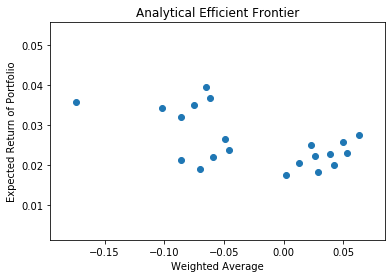

In [65]:
#analytical approach, we choose 2 assets and divide weight 0.5
E_R1 = data['IBM'].pct_change().mean()*len(data['IBM'])
E_R2 = data['Coca.Cola'].pct_change().mean()*len(data['Coca.Cola'])
delta1 = data['IBM'].pct_change().var() #variance of return
delta2 = data['Coca.Cola'].pct_change().var()

#Expected Returns and WA and weight
weight = 0.5
E_Ri = []
D_Ri = []
WA = []
E_p = []

for asset in data:
    E_Ri.append(data[asset].pct_change().mean()*len(data[asset]))
    D_Ri.append(data[asset].pct_change().var()*len(data[asset]))

#calculate the weighted averages and the Expected Return of the Portfolio
for i in range(len(D_Ri)):
    for j in range(i+1,len(D_Ri)):
        WA.append(weight*D_Ri[i]+weight*D_Ri[j])
        E_p.append(weight*E_Ri[i]+weight*E_Ri[j])

plt.scatter(E_p, WA)
plt.title("Analytical Efficient Frontier")
plt.xlabel("Weighted Average")
plt.ylabel("Expected Return of Portfolio")


In [5]:
#first thing to do is to get combinations of portfolios
np.random.seed(1)

#returns, volatility, and weights of portfolios
portfolio_ret = []
portfolio_vola = []
weights = []

#number of portfolios to consider
num_assets = len(data.columns.values) #the number of assets we consider
num_portfolios = 50000 #we can set this value

#populate the portfolios, randomly (monte carlo)
for portfolio in range(num_portfolios):
    weight = np.random.random(num_assets)
    weight /= np.sum(weight)
    returns = np.dot(weight, annual_ret)
    volatility = np.sqrt(np.dot(weight.T, np.dot(annual_cov, weight)))
    portfolio_ret.append(returns)
    portfolio_vola.append(volatility)
    weights.append(weight)

#portfolio in searchable format
portfolio_ = {"Returns": portfolio_ret, "Volatility": portfolio_vola}

#create dataframe
data_EF = pd.DataFrame(portfolio_)   

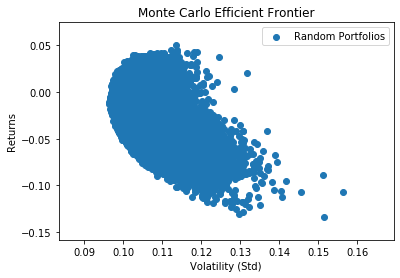

In [66]:
#visualizet
plt.scatter(data=data_EF, x="Volatility", y="Returns", label="Random Portfolios")
plt.xlabel("Volatility (Std)")
plt.ylabel("Returns")
plt.title("Monte Carlo Efficient Frontier")
plt.legend()
plt.show()

In [7]:
#find the weights of the portfolio with the minimum volatility
i = data_EF['Volatility'].idxmin()
print("Minimum Volatility Portfolio Weights:", weights[i])

#show the return of this portfolio
print("Minimum Volatility Portfolio Returns:", portfolio_ret[i])

#compare it to some values around it
print(portfolio_ret[i-10:i+10])

Minimum Volatility Portfolio Weights: [0.30714002 0.03302884 0.09401267 0.19675696 0.09482896 0.15790135
 0.11633121]
Minimum Volatility Portfolio Returns: -0.011143252331514437
[-0.02572767764608835, -0.02502121474405879, -0.021337815266144193, -0.0504295352684485, -0.030194934120733433, -0.008248741983543351, -0.03368424429699571, 0.006896292452796852, 0.001655341621279045, -0.034686791004444065, -0.011143252331514437, 0.0002975418775109061, -0.00404576143466346, -0.011252269428614164, -0.03276728120196155, -0.037247725134030525, -0.059881909939698275, -0.04861705516171918, -0.024937919174498904, -0.033833277153448076]


We can see that this portfolio's returns are better than most of the other values around it, but it is not the best value for the return (there are some other values better than it). This tells us that there is more at play than just finding the best return at any given time. We can see that less volatility usually has a higher return, up until a certain point, where we have to take some more risk in order to achieve better returns. We can see the curve that defines the "Efficient Frontier"